# Hyperparameter

val acc:0.08 | lr:6.412653753995083e-06, weight decay:7.493936255799681e-08
val acc:0.33 | lr:0.0010850845686264563, weight decay:1.2203167517955227e-07
val acc:0.1 | lr:0.00011451421785263431, weight decay:2.1320304614985248e-07
val acc:0.06 | lr:0.0002850205222810836, weight decay:2.4624688624586234e-08
val acc:0.16 | lr:0.0004330672042454855, weight decay:2.9972008178937247e-08
val acc:0.1 | lr:1.6777906674126554e-06, weight decay:2.0825365952568668e-05
val acc:0.13 | lr:0.0005782868825209049, weight decay:1.961351027456247e-06
val acc:0.08 | lr:0.00012006571539372485, weight decay:5.9806748799147155e-05
val acc:0.04 | lr:0.00018456252925140124, weight decay:3.2403839494854296e-05
val acc:0.19 | lr:2.7702479351103084e-06, weight decay:1.4627721424279788e-07
val acc:0.12 | lr:1.064467748818205e-06, weight decay:1.5606597954984467e-08
val acc:0.09 | lr:2.569357164551308e-06, weight decay:4.826209215826768e-07
val acc:0.28 | lr:0.0013862165339001452, weight decay:3.0593288403134916e-08

Best-13(val acc:0.56) | lr:0.005213085225581937, weight decay:1.2271469561474708e-05
Best-14(val acc:0.53) | lr:0.0048274962835475315, weight decay:2.4699366914684204e-08
Best-15(val acc:0.44) | lr:0.004111281452517725, weight decay:4.66721717156704e-07
Best-16(val acc:0.4) | lr:0.0015934903002153957, weight decay:2.806589695112182e-06
Best-17(val acc:0.39) | lr:0.0021366302096972995, weight decay:4.570866659602537e-08
Best-18(val acc:0.33) | lr:0.0010850845686264563, weight decay:1.2203167517955227e-07
Best-19(val acc:0.28) | lr:0.0013862165339001452, weight decay:3.0593288403134916e-08
Best-20(val acc:0.25) | lr:0.0009701398177563353, weight decay:1.8335725203798646e-06


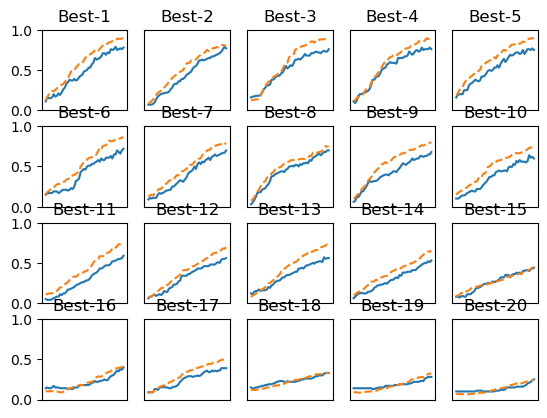

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
